# Facial Keypoints Detection

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import copy
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.utils import class_weight
from tensorflow.keras.models import Model, Sequential
from keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from keras.layers import Dense, Conv2D, ZeroPadding2D, BatchNormalization, Activation, AveragePooling2D, MaxPooling2D, Add, Input, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Data Science Portfolio/Facial Keypoints Detection & Emotion Recognition/

/content/drive/MyDrive/Data Science Portfolio/Emotion Detection


## Load Facial Data

In [ ]:
keyfacial_df = pd.read_csv("training.csv")
keyfacial_df.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [ ]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

## Data Exploration

### Exploring "left_eye_center_x" Column

In [ ]:
keyfacial_df["left_eye_center_x"]

0       66.033564
1       64.332936
2       65.057053
3       65.225739
4       66.725301
5       69.680748
6       64.131866
7       67.468893
8       65.802880
9       64.121231
10      65.230189
11      66.737600
12      66.574737
13      65.270588
14      66.607158
15      68.491294
16      66.676941
17      66.850428
18      67.839508
19      69.233455
20      65.595600
21      64.762466
22      66.082737
23      64.718582
24      66.334316
25      64.553043
26      65.318400
27      65.459410
28      65.376914
29      72.353185
30      64.155593
31      64.956293
32      69.441753
33      67.508870
34      65.378072
35      66.059520
36      64.712490
37      66.214957
38      67.039680
39      64.332493
40      69.375158
41      65.795692
42      67.000755
43      66.225558
44      65.367099
45      67.519304
46      65.628697
47      66.824949
48      65.179569
49      65.721718
50      64.308141
51      65.815437
52      63.483915
53      67.424269
54      64.997189
55      66

In [ ]:
# mean and median are same distribution so x-coordinates is approximately symmetric.
keyfacial_df["left_eye_center_x"].describe()

count    7039.000000
mean       66.359021
std         3.448233
min        22.763345
25%        65.082895
50%        66.497566
75%        68.024752
max        94.689280
Name: left_eye_center_x, dtype: float64

In [ ]:
keyfacial_df["left_eye_center_x"].isna().sum()

10

### Exploring "left_eye_center_y" Column

In [ ]:
keyfacial_df["left_eye_center_y"]

0       39.002274
1       34.970077
2       34.909642
3       37.261774
4       39.621261
5       39.968748
6       34.290040
7       39.413452
8       34.755200
9       36.740308
10      34.342642
11      39.886400
12      37.308000
13      34.940235
14      38.938105
15      35.900235
16      33.941224
17      35.636988
18      38.597908
19      40.021527
20      36.626400
21      34.933389
22      37.153705
23      35.861225
24      33.721263
25      36.524174
26      35.270400
27      38.908564
28      38.128914
29      34.417067
30      35.253844
31      35.235512
32      37.851616
33      35.727652
34      35.632023
35      36.848640
36      34.268082
37      35.637774
38      32.372016
39      34.607277
40      37.998400
41      38.300923
42      39.155321
43      38.061027
44      38.581828
45      35.251200
46      38.076697
47      40.912271
48      37.099569
49      39.061399
50      36.563012
51      35.079617
52      37.428153
53      39.628719
54      36.676324
55      35

In [ ]:
# mean and median are same distribution so x-coordinates is approximately symmetric.
keyfacial_df["left_eye_center_y"].describe()

count    7039.000000
mean       37.651234
std         3.152926
min         1.616512
25%        35.900451
50%        37.528055
75%        39.258449
max        80.502649
Name: left_eye_center_y, dtype: float64

In [ ]:
keyfacial_df["left_eye_center_x"].isna().sum()

10

### Exploring "right_eye_center_x" Column

In [ ]:
keyfacial_df["right_eye_center_x"]

0       30.227008
1       29.949277
2       30.903789
3       32.023096
4       32.244810
5       29.183551
6       29.578953
7       29.355961
8       27.475840
9       29.468923
10      28.802717
11      30.270400
12      30.445263
13      33.022745
14      28.596211
15      27.831216
16      30.713647
17      32.528110
18      28.016738
19      25.550836
20      31.540800
21      31.859729
22      27.978316
23      31.590684
24      29.077053
25      32.219826
26      30.309581
27      32.051410
28      29.215543
29      28.655407
30      30.757940
31      29.116683
32      28.693479
33      30.668348
34      30.190964
35      26.589120
36      30.857143
37      30.462609
38      27.139680
39      32.889863
40      28.730105
41      30.868308
42      28.954868
43      29.017487
44      30.703470
45      29.280000
46      31.305910
47      31.557153
48      30.526523
49      33.084074
50      31.247435
51      31.070197
52      32.447319
53      28.486992
54      29.437405
55      29

In [ ]:
# mean and median are same distribution so x-coordinates is approximately symmetric.
keyfacial_df["right_eye_center_x"].describe()

count    7036.000000
mean       30.306102
std         3.083230
min         0.686592
25%        28.783339
50%        30.251378
75%        31.768334
max        85.039381
Name: right_eye_center_x, dtype: float64

In [ ]:
keyfacial_df["right_eye_center_x"].isna().sum()

13

### Exploring "left_eye_inner_corner_x" Column

In [ ]:
keyfacial_df["left_eye_inner_corner_x"]

0       59.582075
1       58.856170
2       59.412000
3       60.003339
4       58.565890
5       62.864299
6       57.797154
7       59.554951
8       58.652160
9       58.620923
10      58.753811
11      61.017600
12      59.036211
13      60.503216
14      61.714526
15      62.322196
16      60.367059
17      61.228800
18      60.139323
19      60.262691
20      59.147400
21      59.924211
22      59.873053
23      59.287899
24      59.936842
25      58.400696
26      60.170496
27      59.832393
28      58.430629
29      63.878519
30      57.238419
31      59.200976
32      62.584986
33      61.213565
34      59.513094
35      60.052800
36      58.875429
37      59.997217
38      60.389760
39      59.630466
40      61.848421
41      58.645538
42      61.334038
43      61.290478
44      58.547921
45      60.990261
46      59.262348
47      60.643525
48      60.228923
49      60.457620
50      60.269929
51      60.075042
52      57.674894
53      61.655395
54      59.199135
55      60

In [ ]:
# mean and median are same distribution so x-coordinates is approximately symmetric
keyfacial_df["left_eye_inner_corner_x"].describe()

count    2271.000000
mean       59.159339
std         2.690354
min        19.064954
25%        58.039339
50%        59.304615
75%        60.519810
max        84.440991
Name: left_eye_inner_corner_x, dtype: float64

In [ ]:
keyfacial_df["left_eye_inner_corner_x"].isna().sum()

4778

### Drop NaN

In [ ]:
# here are 22 columns of the 30 with missing values between 60-70%.
# drop rows with missing values and apply data augmentation
keyfacial_df.dropna(inplace = True)

In [ ]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float64
 1

In [ ]:
keyfacial_df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
keyfacial_df.reset_index(drop=True, inplace=True)

### Exploring "Image" Column

In [ ]:
keyfacial_df['Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
5       167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6       109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7       178 177 178 179 179 179 181 185 188 184 192 20...
8       164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9       226 227 225 224 221 220 215 210 210 208 206 18...
10      52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...
11      142 124 123 133 140 147 151 147 137 136 125 12...
12      86 93 106 114 112 110 111 113 138 147 148 132 ...
13      75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...
14      119 106 101 106 89 66 67 72 85 112 118 109 96 ...
15      52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...
16      201 200 202 193 124 59 53 50 48 56 66 76 114 1...
17      202 20

In [ ]:
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, sep = ' ').reshape(96, 96))

In [ ]:
keyfacial_df['Image'][0]

array([[238., 236., 237., ..., 250., 250., 250.],
       [235., 238., 236., ..., 249., 250., 251.],
       [237., 236., 237., ..., 251., 251., 250.],
       ...,
       [186., 183., 181., ...,  52.,  57.,  60.],
       [189., 188., 207., ...,  61.,  69.,  78.],
       [191., 184., 184., ...,  70.,  75.,  90.]])

In [ ]:
keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,40.050971,50.002113,67.752000,40.293408,94.269957,48.823425,51.300571,39.445859,39.676082,44.857962,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


### Image Augmentation

In [ ]:
# create new dataframe to apply image augmentation on it
df_copy_1 = keyfacial_df.copy()

In [ ]:
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
# obtaining all column except the 'Image'
columns = df_copy_1.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
df_copy_1['Image'][0]

array([[238., 236., 237., ..., 250., 250., 250.],
       [235., 238., 236., ..., 249., 250., 251.],
       [237., 236., 237., ..., 251., 251., 250.],
       ...,
       [186., 183., 181., ...,  52.,  57.,  60.],
       [189., 188., 207., ...,  61.,  69.,  78.],
       [191., 184., 184., ...,  70.,  75.,  90.]])

Horizontal Flip

In [ ]:
# flip along x-axis
df_copy_1['Image'] = df_copy_1['Image'].apply(lambda x: np.flip(x, axis = 1))

In [ ]:
# flipping x coordinate values
for i in range(len(columns)):
  if i%2 == 0:
    df_copy_1[columns[i]] = df_copy_1[columns[i]].apply(lambda x: 96 - x)

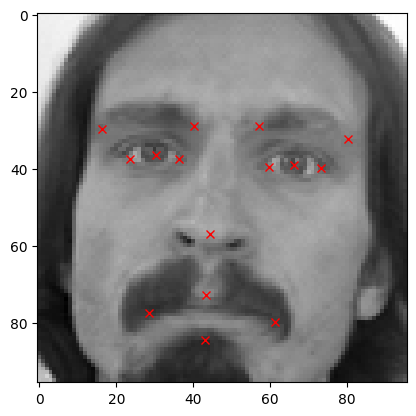

In [ ]:
# original image
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for i in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][i-1], keyfacial_df.loc[0][i], 'rx')

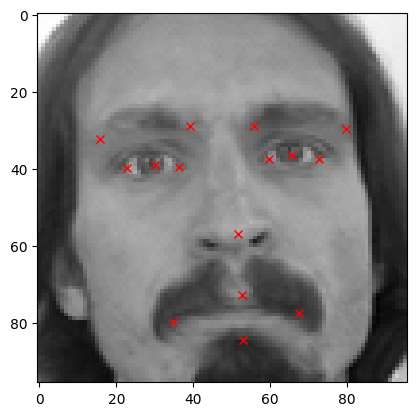

In [ ]:
# flipped image
plt.imshow(df_copy_1['Image'][0],cmap='gray')
for i in range(1, 31, 2):
        plt.plot(df_copy_1.loc[0][i-1], df_copy_1.loc[0][i], 'rx')

In [ ]:
# concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, df_copy_1))

In [ ]:
augmented_df.shape

(4280, 31)

Increase Brightness of the image

In [ ]:
# create new dataframe to apply image augmentation
df_copy_2 = keyfacial_df.copy()
df_copy_2['Image'] = df_copy_2['Image'].apply(lambda x:np.clip(random.uniform(1.2, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, df_copy_2))
augmented_df.shape

(6420, 31)

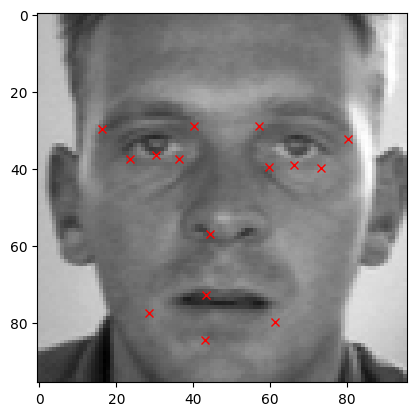

In [ ]:
# original image
plt.imshow(keyfacial_df['Image'][99], cmap='gray')
for i in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][i-1], keyfacial_df.loc[0][i], 'rx')

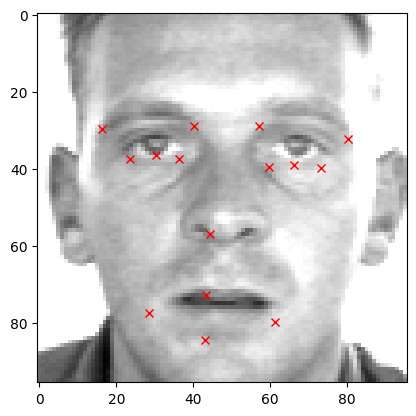

In [ ]:
# brightened image
plt.imshow(df_copy_2['Image'][99], cmap='gray')
for i in range(1, 31, 2):
        plt.plot(df_copy_2.loc[0][i-1], df_copy_2.loc[0][i], 'rx')

Vertical Flip

In [ ]:
# flip along y-axis
df_copy_3 = keyfacial_df.copy()
df_copy_3['Image'] = df_copy_3['Image'].apply(lambda x : np.flip(x, axis = 0))

In [ ]:
# mirroring along y-axis
for i in range(len(columns)):
  if i % 2 == 1:
    df_copy_3[columns[i]] = df_copy_3[columns[i]].apply(lambda x: 96 - x)

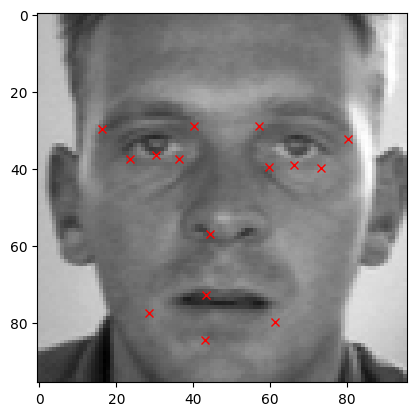

In [ ]:
# original image
plt.imshow(keyfacial_df['Image'][99], cmap='gray')
for i in range(1,31,2):
  plt.plot(keyfacial_df.loc[0][i-1],keyfacial_df.loc[0][i],'rx')

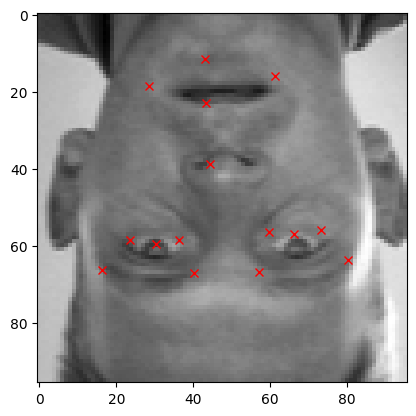

In [ ]:
# flipped image
plt.imshow(df_copy_3['Image'][99], cmap='gray')
for i in range(1,31,2):
  plt.plot(df_copy_3.loc[0][i-1],df_copy_3.loc[0][i],'rx')

In [ ]:
augmented_df = np.concatenate((augmented_df, df_copy_1))
augmented_df.shape

(8560, 31)

### Tensor Creation for CNN Input

In [ ]:
len(augmented_df)


8560

In [ ]:
img = augmented_df[:,30]

# normalize image
img = img/255.

# create tensor to feed the cnn
X = np.empty((len(img), 96, 96, 1))

# expanding array's dimension from (96, 96) to (96, 96, 1) filling it
for i in range(len(img)):
  X[i] = np.expand_dims(img[i], axis = 2)

X = X.astype(np.float32)

X.shape

(8560, 96, 96, 1)

In [ ]:
X

array([[[[0.93333334],
         [0.9254902 ],
         [0.92941177],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.92156863],
         [0.93333334],
         [0.9254902 ],
         ...,
         [0.9764706 ],
         [0.98039216],
         [0.9843137 ]],

        [[0.92941177],
         [0.9254902 ],
         [0.92941177],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.98039216]],

        ...,

        [[0.7294118 ],
         [0.7176471 ],
         [0.70980394],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],

        [[0.7411765 ],
         [0.7372549 ],
         [0.8117647 ],
         ...,
         [0.23921569],
         [0.27058825],
         [0.30588236]],

        [[0.7490196 ],
         [0.72156864],
         [0.72156864],
         ...,
         [0.27450982],
         [0.29411766],
         [0.3529412 ]]],


       [[[0.85882354],
         [0.84313726],
         [0.8 

In [ ]:
y = augmented_df[:,:30].astype(np.float32)
y.shape

(8560, 30)

In [ ]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(6848, 96, 96, 1)

In [ ]:
X_test.shape

(1712, 96, 96, 1)

## Build ResNet Model

In [ ]:
def res_block(X, stage, filter):
    # convolution block
    X_copy = X
    f1, f2, f3 = filter

    # convolution block main path
    X = Conv2D(f1, (1, 1), strides=(1, 1))(X)
    X = MaxPooling2D((2, 2))(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)

    X = Conv2D(f2, (3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)

    X = Conv2D(f3, (1, 1), strides=(1, 1))(X)
    X = BatchNormalization()(X)

    # convolution block short path
    X_copy = Conv2D(f3, (1, 1), strides=(1, 1))(X_copy)
    X_copy = MaxPooling2D((2, 2))(X_copy)
    X_copy = BatchNormalization()(X_copy)

    # check and applies zero-padding to match dimensions
    if X.shape[1] != X_copy.shape[1]:
        diff = X_copy.shape[1] - X.shape[1]
        X = ZeroPadding2D(padding= ((0, diff), (0, diff)))(X)

    # adding
    X = Add()([X, X_copy])
    X = Activation("relu")(X)

    # 1st identity block
    X_copy = X

    X = Conv2D(f1, (1, 1), strides=(1, 1))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, (3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)

    X = Conv2D(f3, (1, 1), strides=(1, 1))(X)
    X = BatchNormalization()(X)

    # adding
    X = Add()([X, X_copy])
    X = Activation("relu")(X)

    # 2nd identity block
    X_copy = X

    X = Conv2D(f1, (1, 1), strides=(1, 1))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, (3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)

    X = Conv2D(f3, (1, 1), strides=(1, 1))(X)
    X = BatchNormalization()(X)

    # Adding
    X = Add()([X, X_copy])
    X = Activation("relu")(X)

    return X

In [ ]:
# 3D tensor shape
X_input = Input(shape=(96, 96, 1))
X = ZeroPadding2D((3, 3))(X_input)
X = Conv2D(64, (7, 7), strides=(2, 2))(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

# 1st res block
X = res_block(X, filter = [64, 64, 256], stage=2)

# 2nd res block
X = res_block(X, filter = [128, 128, 512], stage=3)

X = AveragePooling2D((2, 2))(X)
X = Flatten()(X)
X = Dense(4096, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation='relu')(X)
X = Dropout(0.1)(X)
X = Dense(30)(X)

model_facial_keypoints = Model(inputs = X_input, outputs = X)
model_facial_keypoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 batch_normalization (Batch  (None, 48, 48, 64)           256       ['conv2d[0][0]']          

In [ ]:
adam = Adam(learning_rate = 0.001)
model_facial_keypoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ["RootMeanSquaredError"])

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [ ]:
history = model_facial_keypoints.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split = 0.05, callbacks = [checkpointer, earlystopping])

Epoch 1/200
204/204 [==============================] - ETA: 0s - loss: 211.8425 - root_mean_squared_error: 14.5548
Epoch 1: val_loss improved from inf to 411.94995, saving model to FacialKeyPoints_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


204/204 [==============================] - 45s 124ms/step - loss: 211.8425 - root_mean_squared_error: 14.5548 - val_loss: 411.9500 - val_root_mean_squared_error: 20.2965
Epoch 2/200
204/204 [==============================] - ETA: 0s - loss: 83.2742 - root_mean_squared_error: 9.1255
Epoch 2: val_loss improved from 411.94995 to 146.48499, saving model to FacialKeyPoints_weights.hdf5
204/204 [==============================] - 6s 29ms/step - loss: 83.2742 - root_mean_squared_error: 9.1255 - val_loss: 146.4850 - val_root_mean_squared_error: 12.1031
Epoch 3/200
202/204 [============================>.] - ETA: 0s - loss: 69.9672 - root_mean_squared_error: 8.3646
Epoch 3: val_loss improved from 146.48499 to 112.98209, saving model to FacialKeyPoints_weights.hdf5
204/204 [==============================] - 7s 33ms/step - loss: 69.7704 - root_mean_squared_error: 8.3529 - val_loss: 112.9821 - val_root_mean_squared_error: 10.6293
Epoch 4/200
203/204 [============================>.] - ETA: 0s - loss:

In [ ]:
# save the model architecture to json file
model_json = model_facial_keypoints.to_json()
with open("FacialKeyPoints_model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
with open('FacialKeyPoints_model.json', 'r') as json_file:
    json_saved_model = json_file.read()

# load the model architecture
model_facial_keypoints = tf.keras.models.model_from_json(json_saved_model)
model_facial_keypoints.load_weights('FacialKeyPoints_weights.hdf5')
adam = Adam(learning_rate=0.001)
model_facial_keypoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ["RootMeanSquaredError"])

##Evaluate Model

In [ ]:
# evaluate the model
result = model_facial_keypoints.evaluate(X_test, y_test)
print("RMSE : {}".format(result[1]))

54/54 [==============================] - 2s 17ms/step - loss: 28.4164 - root_mean_squared_error: 5.3307
RMSE : 5.330702304840088


In [ ]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

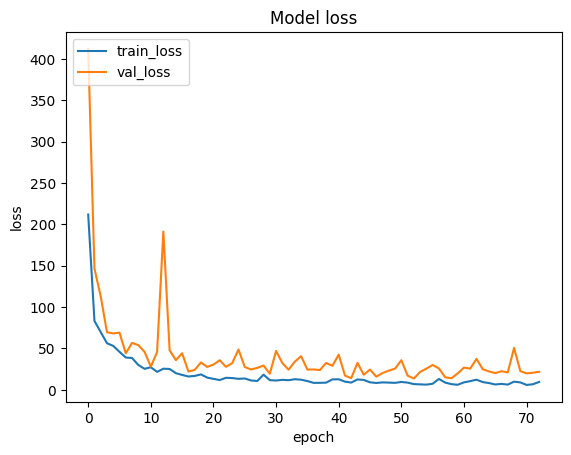

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper left')
plt.show()

# Emotion Detection

## Load Data

In [ ]:
facial_df = pd.read_csv("icml_face_data.csv")
facial_df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
facial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


## Data Exploration

### Exploring "emotion" Column

In [ ]:
facial_df["emotion"].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

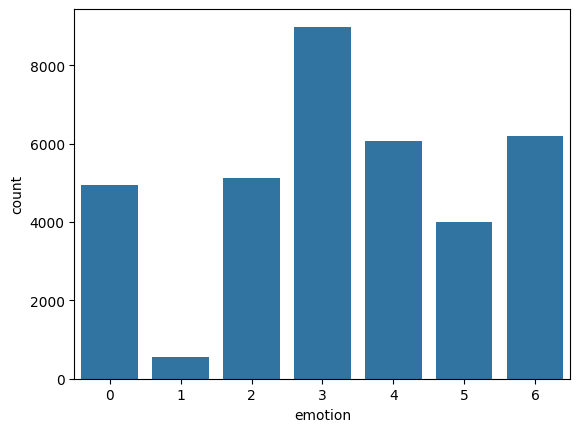

In [ ]:
sns.countplot(x = "emotion", data = facial_df)
plt.show()

In [ ]:
# facial_df = facial_df[facial_df['emotion'] != 1]

In [ ]:
emotion_mapping = {0:'Angry',1 :'Disgusted', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

### Exploring " Usage" Column

In [ ]:
facial_df[" Usage"].value_counts()

 Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [ ]:
facial_df = facial_df[facial_df[' Usage'] == 'Training']
facial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28709 entries, 0 to 28708
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1    Usage   28709 non-null  object
 2    pixels  28709 non-null  object
dtypes: int64(1), object(2)
memory usage: 897.2+ KB


In [ ]:
facial_df = facial_df.drop(' Usage', axis=1)

In [ ]:
facial_df.duplicated().sum()

1194

In [ ]:
facial_df.drop_duplicates(inplace  = True)

In [ ]:
facial_df.isna().sum()

emotion    0
 pixels    0
dtype: int64

### Exploring "pixels" Column

In [ ]:
facial_df.rename(columns={" pixels": "pixels"}, inplace=True)

In [ ]:
facial_df["pixels"][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
# function to convert series to numpy array, type to float32, reshape to 3 dimensions
def process_pixels(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
facial_df["pixels"] = facial_df["pixels"].apply(lambda x : process_pixels(x))

In [ ]:
# use bicubic interpolation for upscaling
def resize_image(x):
  return cv2.resize(x, dsize = (96,96), interpolation = cv2.INTER_CUBIC)

In [ ]:
# resize to (96,96)
facial_df['pixels'] = facial_df['pixels'].apply(lambda x: resize_image(x))

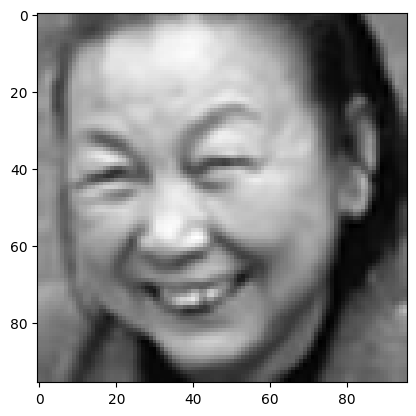

In [ ]:
# check after resize
plt.imshow(facial_df['pixels'][99], cmap = 'gray')

In [ ]:
facial_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[232.82553, 229.81886, 225.59953, 200.68909, ..."
3,4,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
4,6,"[[4.771652, 3.3384705, 0.9779358, -0.45524597,..."


## Visualize Emotion vs Picture

In [ ]:
facial_df["emotion"].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
facial_df[facial_df["emotion"] == 3][:1]

,emotion,pixels
7,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


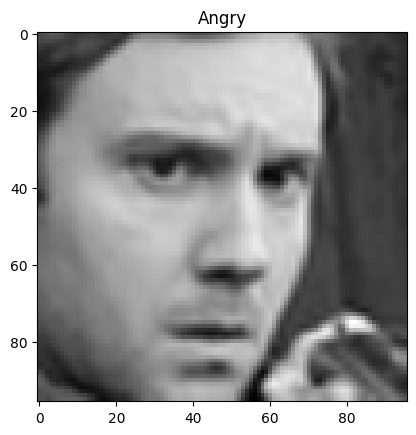

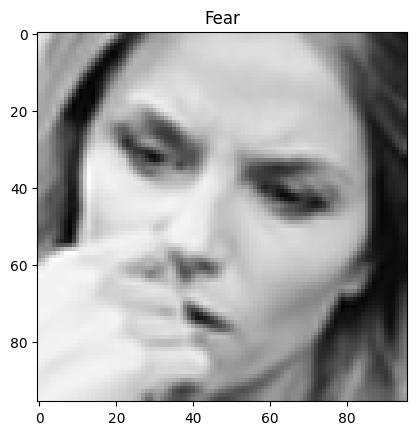

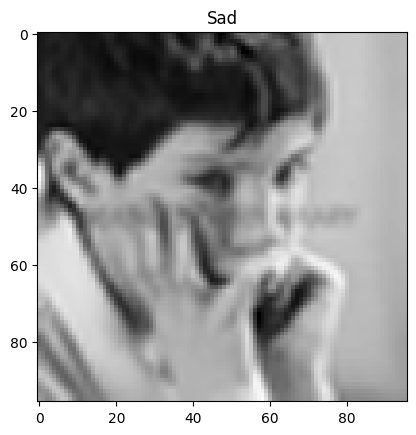

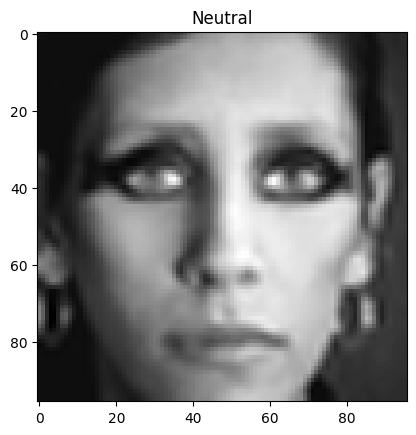

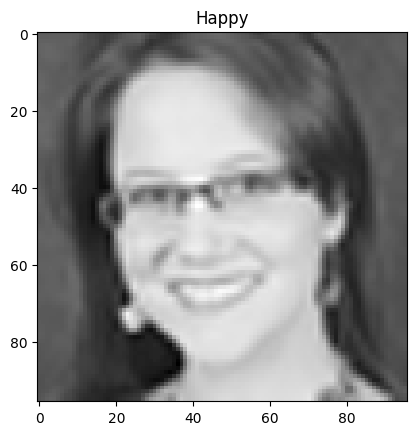

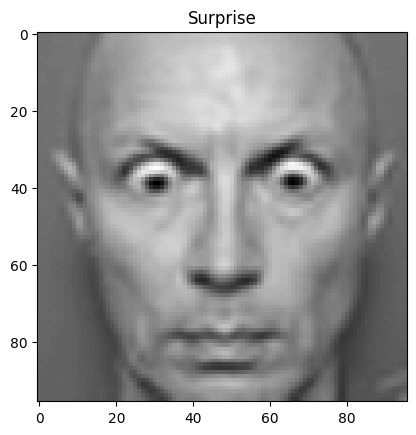

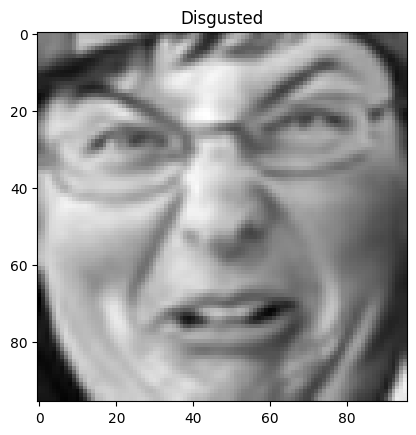

In [ ]:
for i in facial_df["emotion"].unique():
    data = facial_df[facial_df["emotion"] == i][:1]
    for index,row in data.iterrows():
        img = row["pixels"]
        plt.figure()
        plt.title(emotion_mapping[i])
        plt.imshow(img, cmap='gray')

## Image Augmentation

In [ ]:
X = facial_df["pixels"]
y = facial_df["emotion"]

In [ ]:
X = np.stack(X, axis = 0)
X = X.reshape(27515 , 96, 96, 1)

In [ ]:
print(X.shape, y.shape)

(27515, 96, 96, 1) (27515,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

In [ ]:
cw = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)

In [ ]:
cw_dict=dict(enumerate(cw))
cw_dict

{0: 1.018299202237026,
 1: 10.497244595167444,
 2: 0.9976230763032794,
 3: 0.5553487328997533,
 4: 0.8327616357277374,
 5: 1.4838806327900287,
 6: 0.803263267159725}

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print(X_val.shape, y_val.shape)

(1376, 96, 96, 1) (1376, 7)


In [ ]:
print(X_test.shape, y_test.shape)

(1376, 96, 96, 1) (1376, 7)


In [ ]:
print(X_train.shape, y_train.shape)

(24763, 96, 96, 1) (24763, 7)


In [ ]:
# rescale
X_train = X_train/255
X_val   = X_val /255
X_test  = X_test/255

In [ ]:
custom_data_augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

## Build and Train Model for Facial Expression Classification

In [ ]:
input_shape = X_train[0].shape

# Define the input layer
inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(inputs)
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(256, kernel_size=(3, 3), activation='relu')(x)
x = Conv2D(256, kernel_size=(3, 3), activation='relu')(x)

x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(512, kernel_size=(3, 3), activation='relu')(x)
x = Conv2D(1024, kernel_size=(3, 3), activation='relu')(x)
x = Conv2D(1024, kernel_size=(3, 3), activation='relu')(x)

x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten layer
x = Flatten()(x)

# Fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# Output layer
outputs = Dense(7, activation='softmax')(x)
model_emotion = Model(inputs= inputs, outputs = outputs)
model_emotion.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 94, 94, 128)       1280      
                                                                 
 batch_normalization_21 (Ba  (None, 94, 94, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 47, 47, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 45, 45, 256)       295168    
                                                                 
 conv2d_24 (Conv2D)          (None, 43, 43, 256)       5900

In [ ]:
# train the network
model_emotion.compile(optimizer = Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "emotion_weights.hdf5", verbose = 1, save_best_only=True)

In [ ]:
history = model_emotion.fit(custom_data_augmentation.flow(X_train, y_train, batch_size = 64),
	validation_data = (X_val, y_val), steps_per_epoch = len(X_train) // 64,
	epochs= 150, callbacks=[checkpointer, earlystopping], class_weight = cw_dict)

Epoch 1/150
386/386 [==============================] - ETA: 0s - loss: 2.7116 - accuracy: 0.1613
Epoch 1: val_loss improved from inf to 1.95652, saving model to emotion_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


386/386 [==============================] - 188s 427ms/step - loss: 2.7116 - accuracy: 0.1613 - val_loss: 1.9565 - val_accuracy: 0.1439
Epoch 2/150
386/386 [==============================] - ETA: 0s - loss: 1.9175 - accuracy: 0.1981
Epoch 2: val_loss improved from 1.95652 to 1.91315, saving model to emotion_weights.hdf5
386/386 [==============================] - 150s 387ms/step - loss: 1.9175 - accuracy: 0.1981 - val_loss: 1.9131 - val_accuracy: 0.2064
Epoch 3/150
386/386 [==============================] - ETA: 0s - loss: 1.8696 - accuracy: 0.2287
Epoch 3: val_loss improved from 1.91315 to 1.82166, saving model to emotion_weights.hdf5
386/386 [==============================] - 147s 380ms/step - loss: 1.8696 - accuracy: 0.2287 - val_loss: 1.8217 - val_accuracy: 0.2805
Epoch 4/150
386/386 [==============================] - ETA: 0s - loss: 1.8182 - accuracy: 0.2387
Epoch 4: val_loss did not improve from 1.82166
386/386 [==============================] - 118s 306ms/step - loss: 1.8182 - acc

In [ ]:
# saving the model architecture to json file
model_json = model_emotion.to_json()
with open("emotion_model.json","w") as json_file:
  json_file.write(model_json)

## Evaluate Model

In [ ]:
with open('emotion_model.json', 'r') as json_file:
    json_saved_model= json_file.read()

# load the model architecture
model_emotion = tf.keras.models.model_from_json(json_saved_model)
model_emotion.load_weights('emotion_weights.hdf5')
model_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
score = model_emotion.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

43/43 [==============================] - 2s 45ms/step - loss: 1.0945 - accuracy: 0.6047
Test Accuracy: 0.604651153087616


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
val_loss_values = history.history['val_loss']
val_accuracy_values = history.history['val_accuracy']

In [ ]:
accuracy_values

[0.16126158833503723,
 0.19814567267894745,
 0.22871370613574982,
 0.2386736273765564,
 0.27430260181427,
 0.296651691198349,
 0.3209846615791321,
 0.34985223412513733,
 0.36543989181518555,
 0.38224220275878906,
 0.4051986038684845,
 0.42143407464027405,
 0.42961254715919495,
 0.4465363025665283,
 0.44451192021369934,
 0.4649176001548767,
 0.4776306748390198,
 0.4825701415538788,
 0.4975909888744354,
 0.4996558427810669,
 0.5013158321380615,
 0.518968403339386,
 0.5250009894371033,
 0.5275112390518188,
 0.539576530456543,
 0.5435037612915039,
 0.5569456219673157,
 0.5539090633392334,
 0.5580387711524963,
 0.5666221380233765,
 0.5748410820960999,
 0.580023467540741,
 0.5879590511322021,
 0.5877161026000977,
 0.5986072421073914,
 0.5956921577453613,
 0.5981618762016296,
 0.5999028086662292,
 0.607231080532074,
 0.6142758727073669,
 0.6191343665122986,
 0.6156492829322815,
 0.6293777227401733,
 0.637799084186554,
 0.6387708187103271,
 0.6280820965766907,
 0.6386898159980774,
 0.647475600

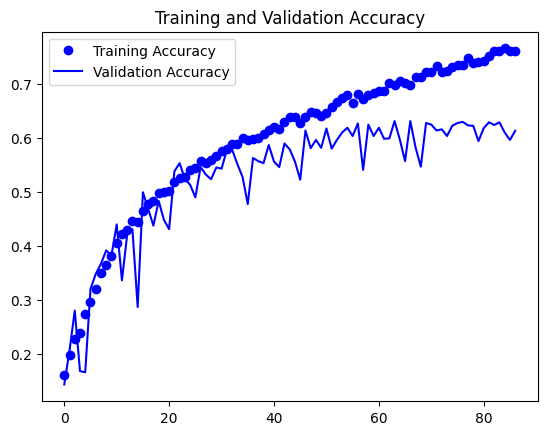

In [ ]:
epochs = range(len(accuracy_values))

plt.plot(epochs, accuracy_values,'bo', label = "Training Accuracy")
plt.plot(epochs, val_accuracy_values,'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

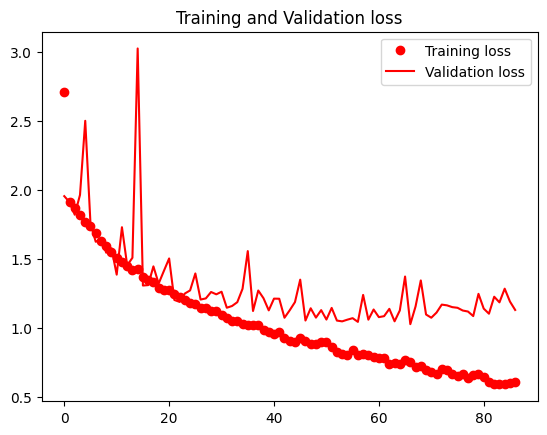

In [ ]:
plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

## Prediction

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_emotion.predict(X_test), axis = -1)
y_true = np.argmax(y_test, axis=-1)

43/43 [==============================] - 2s 42ms/step


<Axes: >

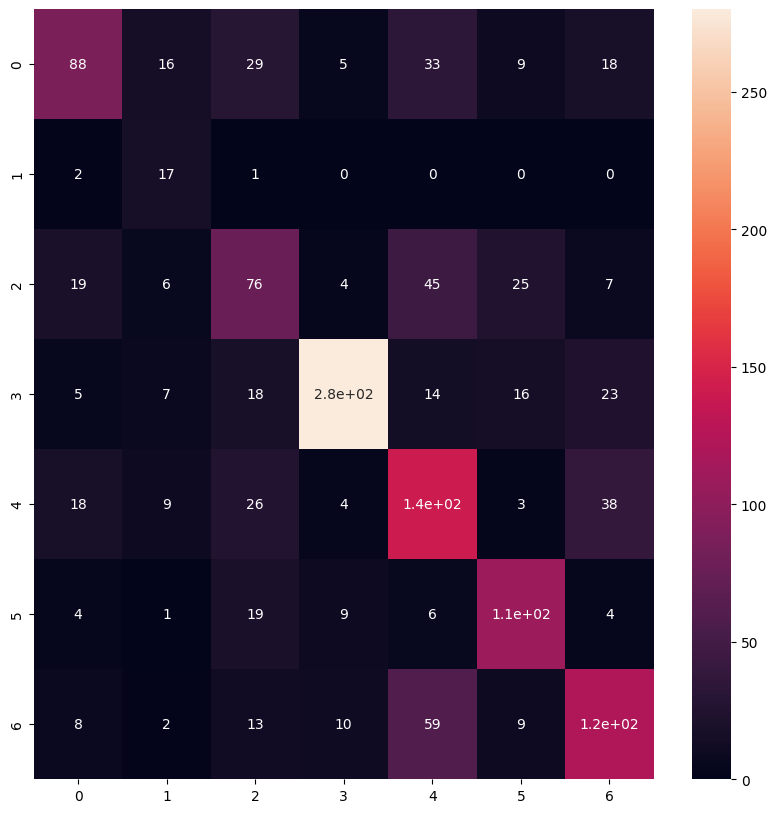

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51       198
           1       0.29      0.85      0.44        20
           2       0.42      0.42      0.42       182
           3       0.90      0.77      0.83       363
           4       0.47      0.59      0.53       239
           5       0.64      0.72      0.67       152
           6       0.57      0.55      0.56       222

    accuracy                           0.60      1376
   macro avg       0.56      0.62      0.57      1376
weighted avg       0.63      0.60      0.61      1376



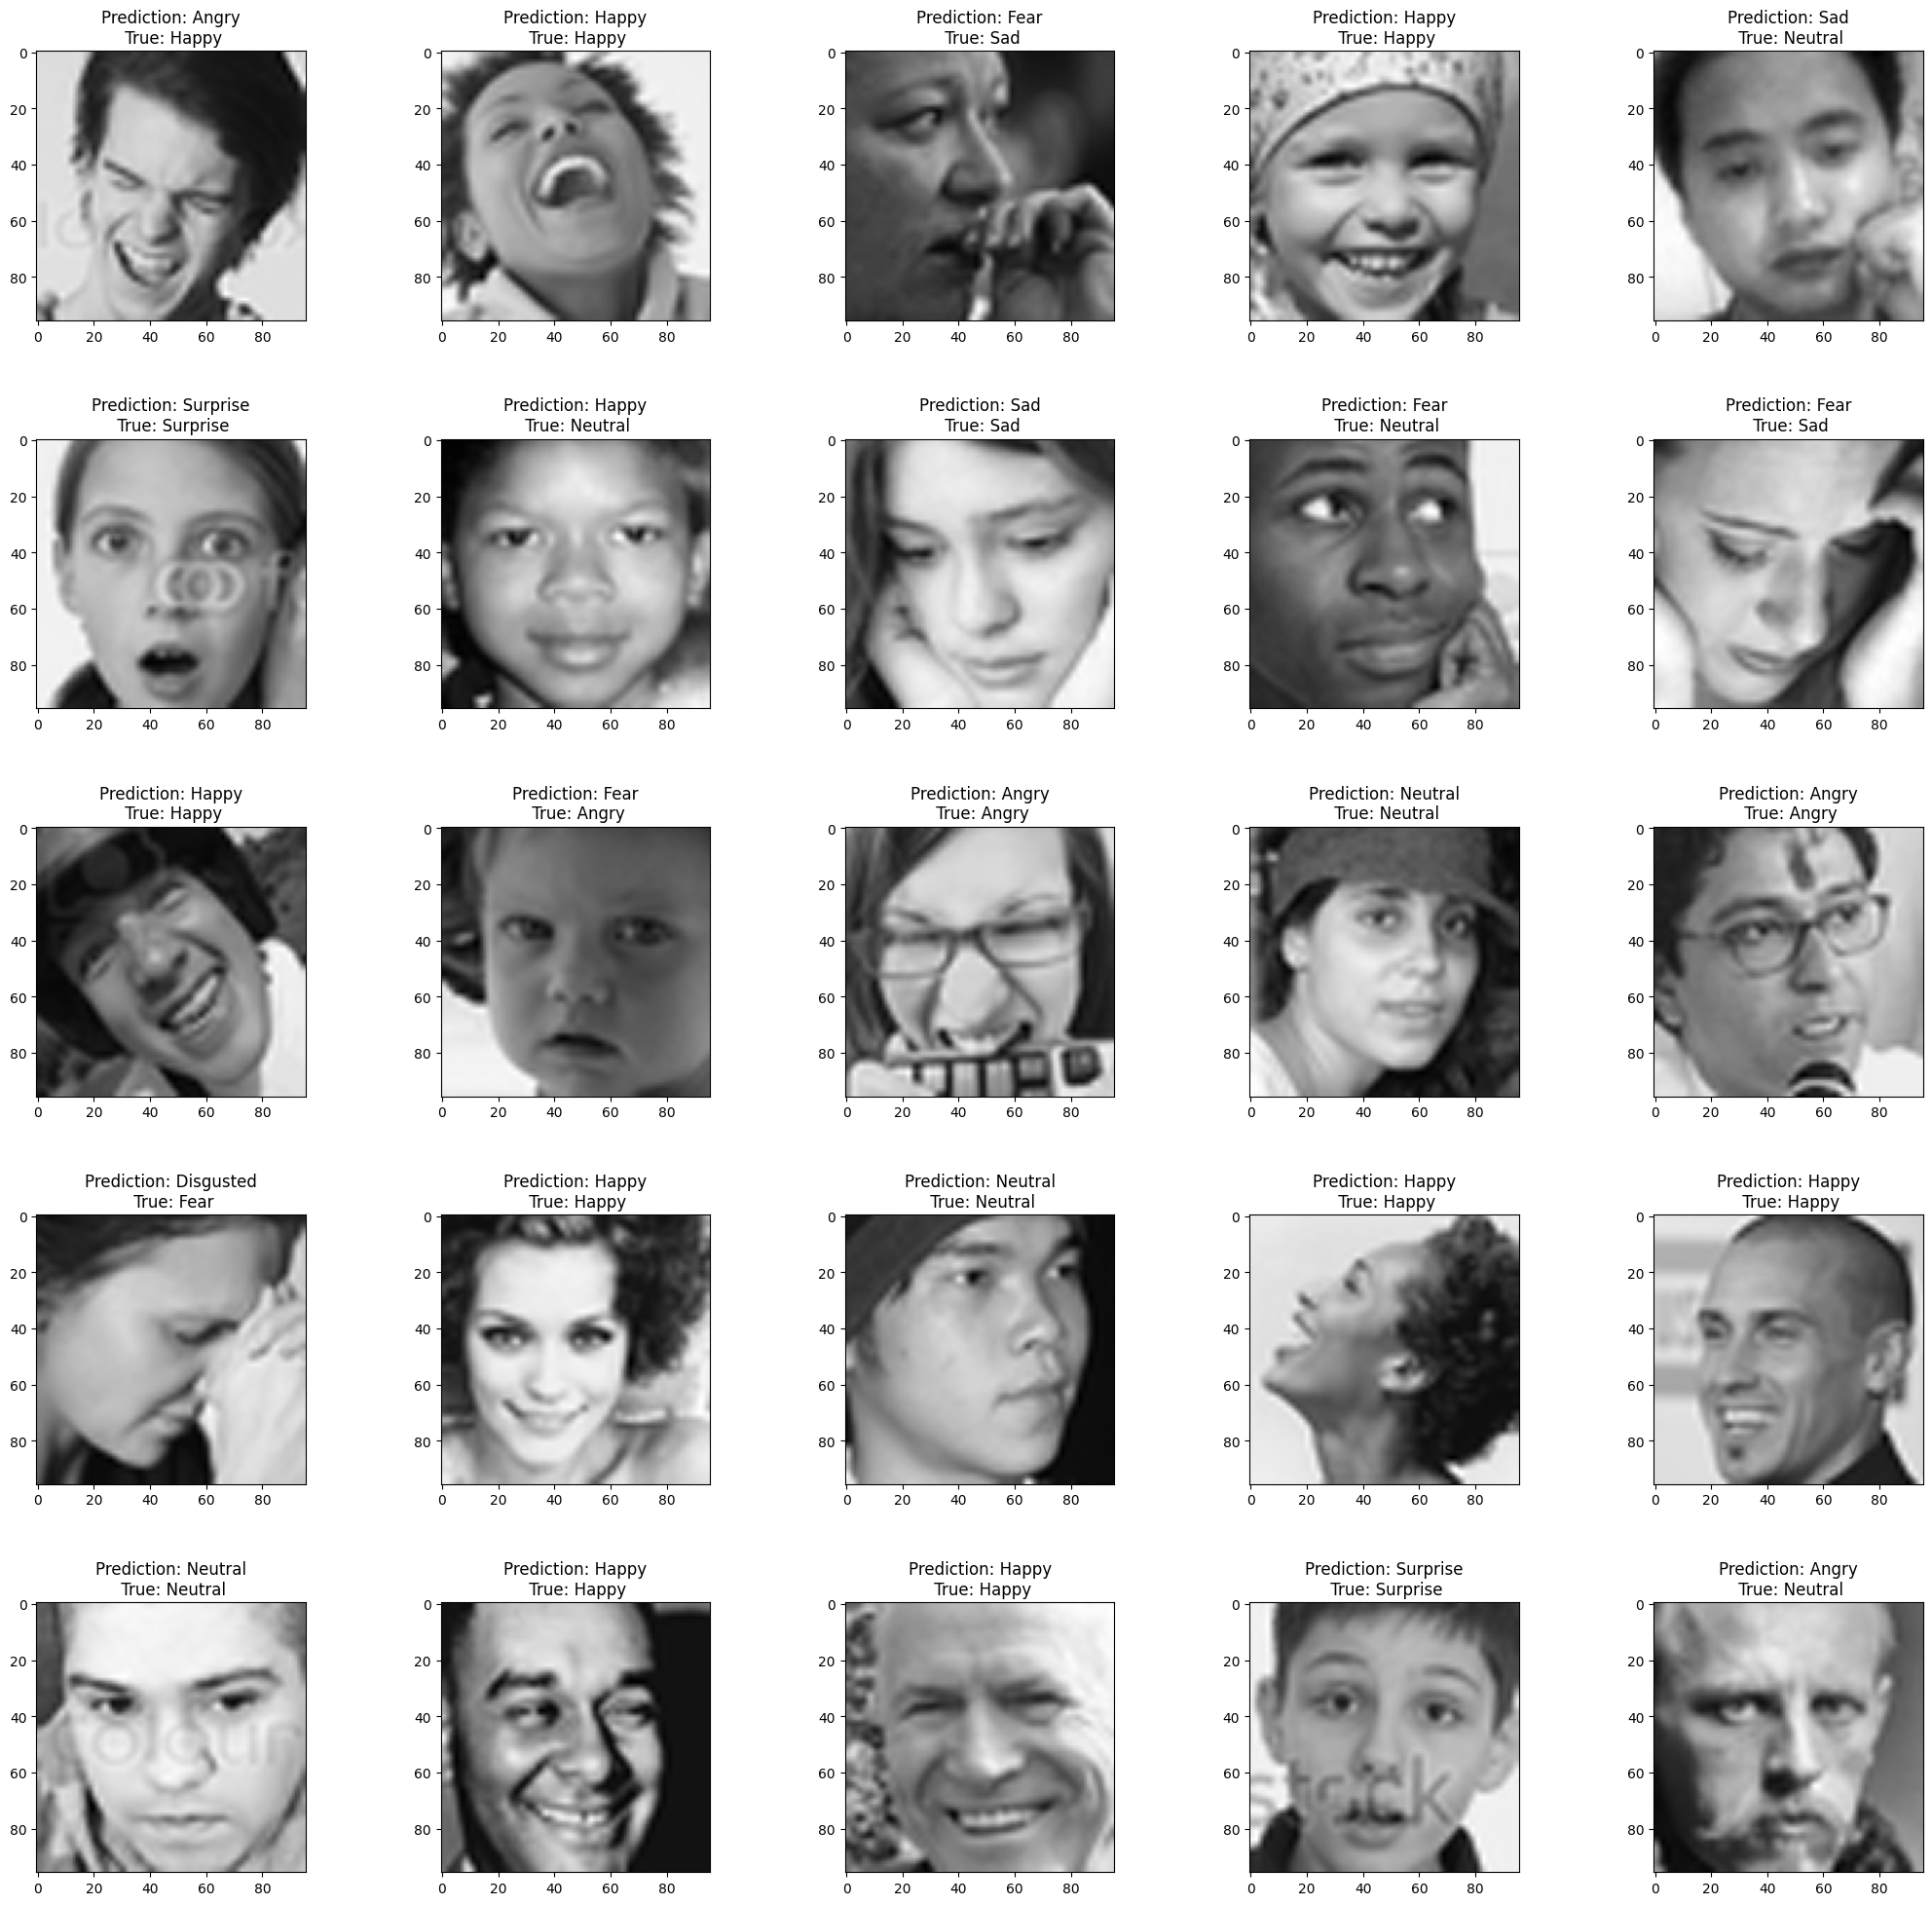

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(25,25))

for i in range(25):
  axs = axes[i//5, i%5]
  axs.set_title(f"Prediction: {emotion_mapping[predicted_classes[i]]}\n True: {emotion_mapping[y_true[i]]}")
  axs.imshow(X_test[i].reshape(96,96), cmap = 'gray')
plt.subplots_adjust(wspace=0.5)

In [ ]:
def predict(X_test):

  # making prediction from the keypoint model
  df_predict = model_facial_keypoints.predict(X_test)

  # making prediction from the emotion model
  df_emotion = np.argmax(model_emotion.predict(X_test), axis=-1)

  # reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

43/43 [==============================] - 2s 43ms/step


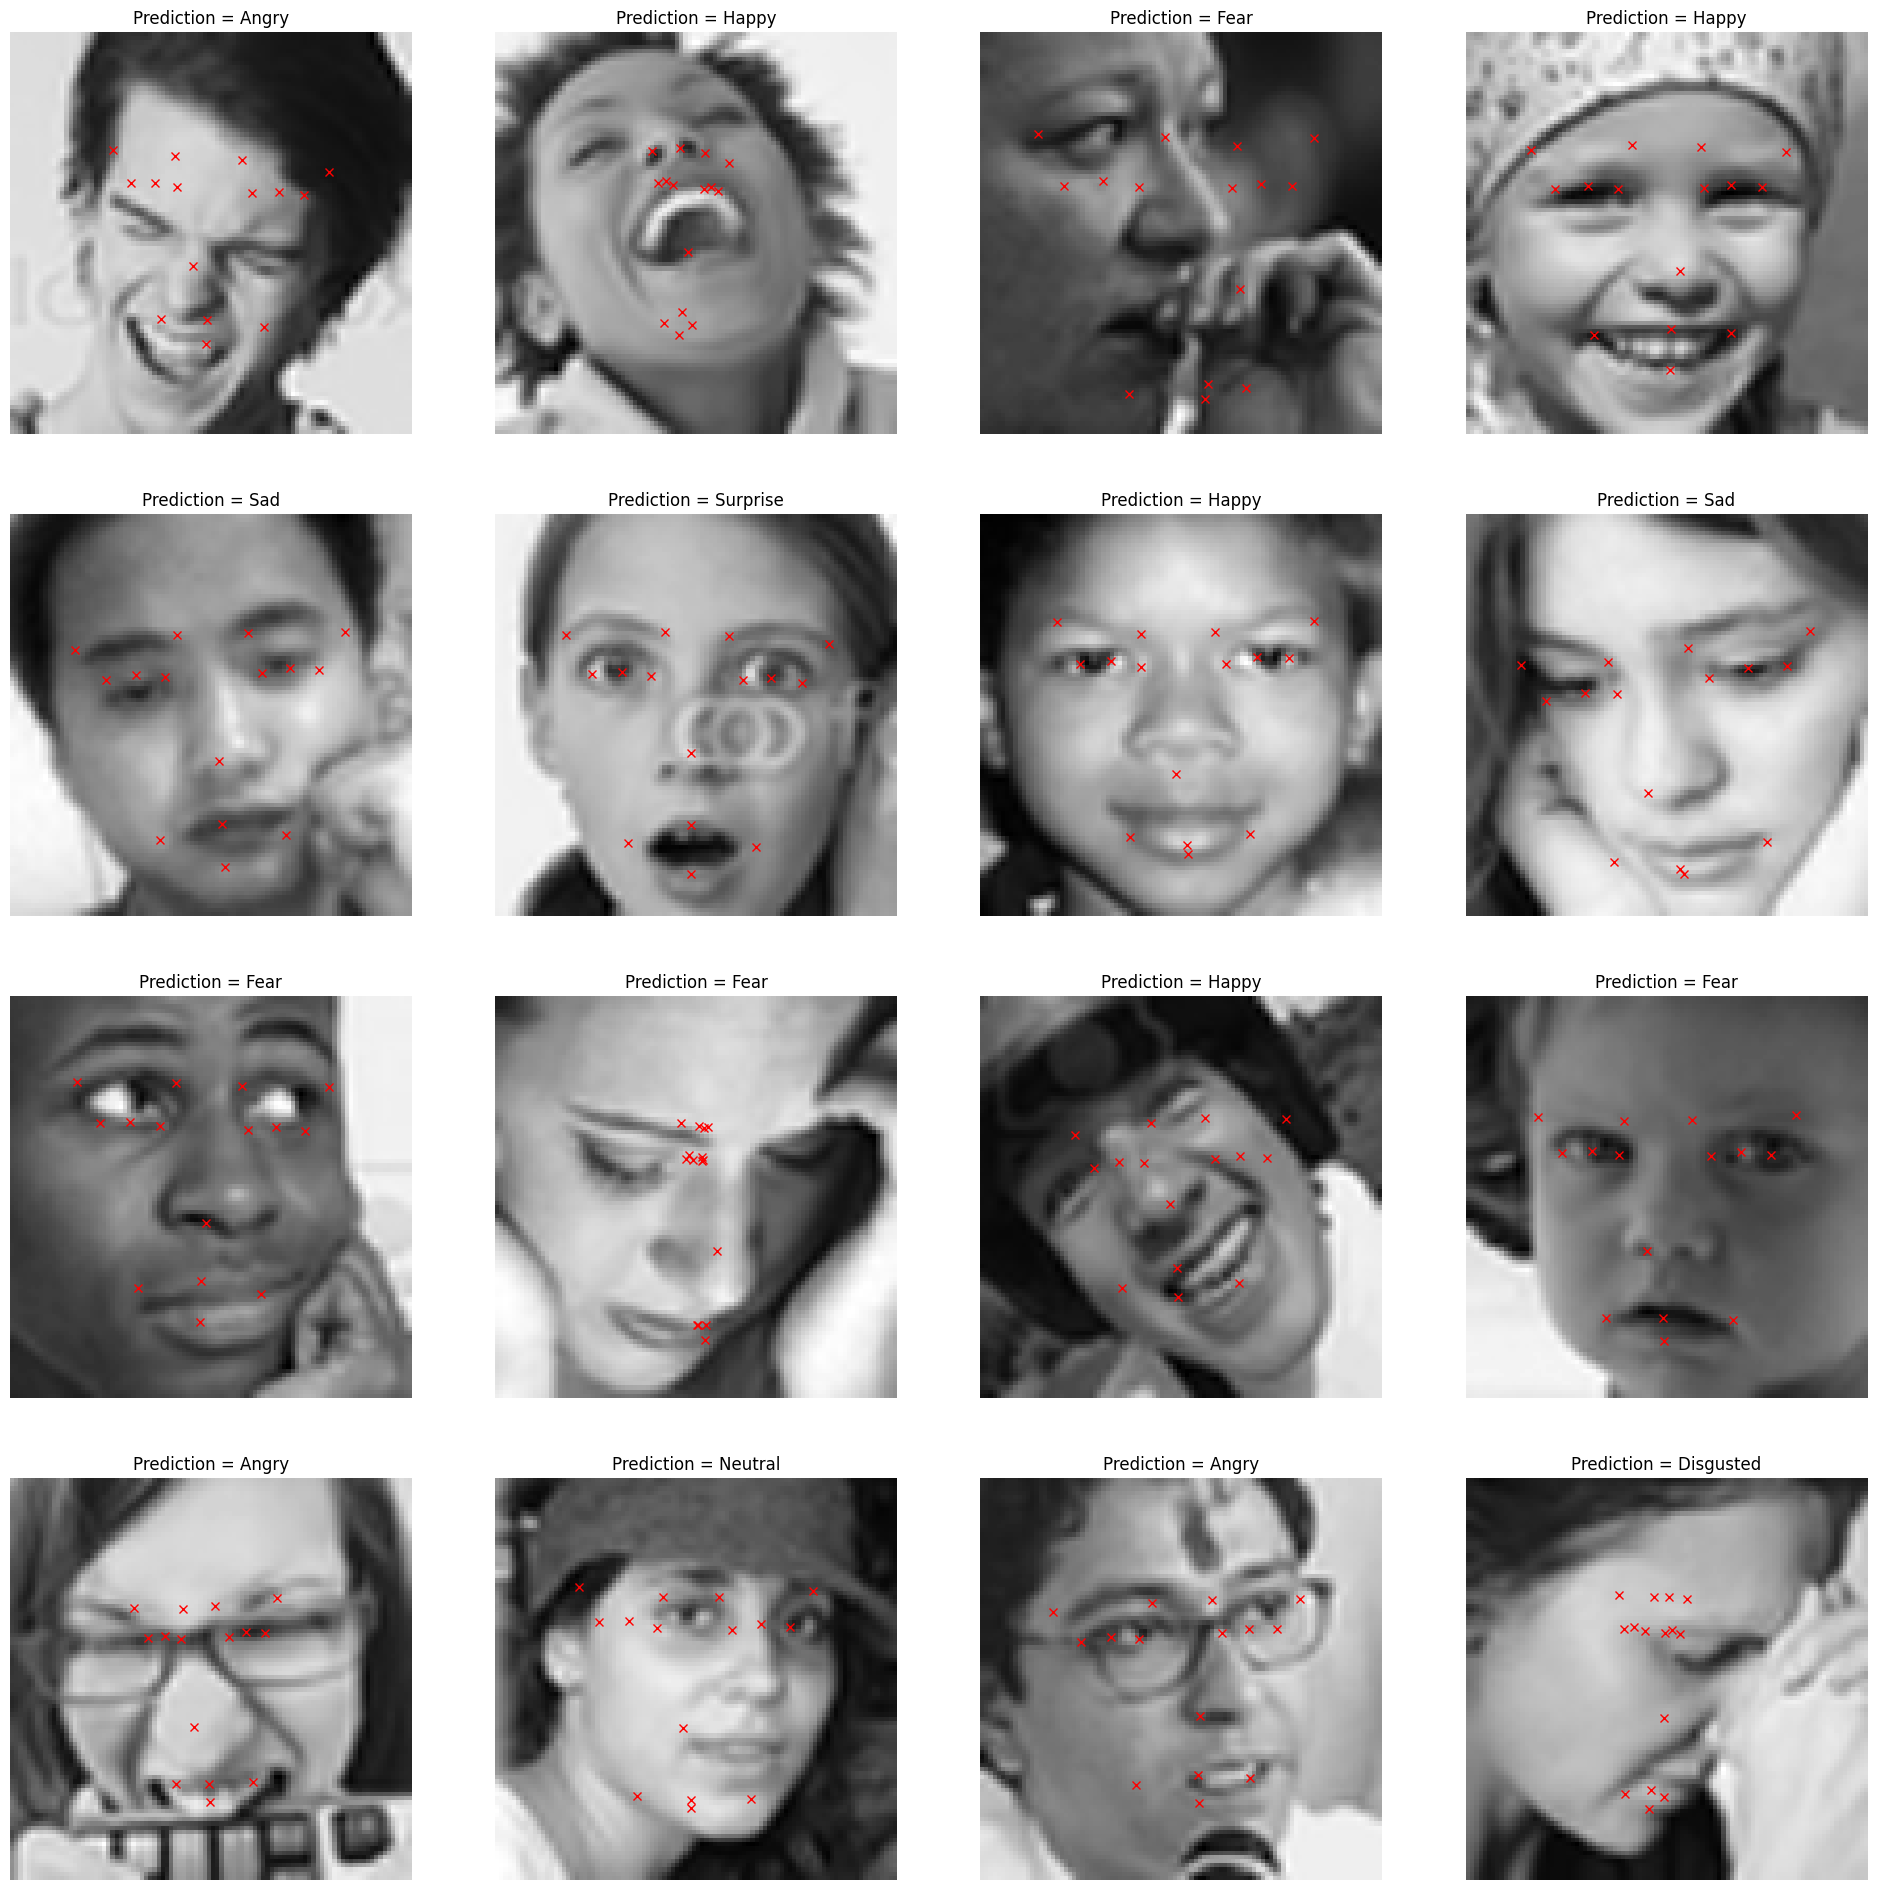

In [ ]:
# plotting test images and their predicted keypoints and emotions

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].set_title(f"Prediction = {emotion_mapping[df_predict['emotion'][i]]}")
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
